In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba
from mplsoccer import Pitch, FontManager, VerticalPitch, add_image
from PIL import Image

Carga de dataframe

In [2]:
partido_inicial=pd.read_csv('final2.csv')

# Convertir las columnas a tipo numérico
partido_inicial['Player'] = partido_inicial['Player'].str.strip()
partido_inicial['Y'] = pd.to_numeric(partido_inicial['Y'], errors='coerce')
partido_inicial['X2'] = pd.to_numeric(partido_inicial['X2'], errors='coerce')
partido_inicial['Y2'] = pd.to_numeric(partido_inicial['Y2'], errors='coerce')

# Definir los valores mínimos y máximos de X en ambas escalas
x1, x2 = 0, 100  # Escala original de X
new_x1, new_x2 = 0, 28  # Nueva escala de X

# Definir los valores mínimos y máximos de Y en ambas escalas
y1, y2 = 0, 100  # Escala original de Y
new_y1, new_y2 = 16, 0  # Nueva escala de Y

# Calcular la coordenada transformada de Y y sobrescribir la columna 'Y' con el resultado
partido_inicial['Y'] = ((new_y2 - new_y1) / (y2 - y1)) * partido_inicial['Y']*-1
partido_inicial['Y2'] = ((new_y2 - new_y1) / (y2 - y1)) * partido_inicial['Y2']*-1
# Calcular la coordenada transformada de X y sobrescribir la columna 'X' con el resultado
partido_inicial['X'] = ((new_x2 - new_x1) / (x2 - x1)) * partido_inicial['X'] 
partido_inicial['X2'] = ((new_x2 - new_x1) / (x2 - x1)) * partido_inicial['X2'] 


# Filtrar las filas donde Mins > 55 (entretiempo)
partido_rotado = partido_inicial[partido_inicial['Mins'] > 60].copy()

# Transformar las coordenadas X, Y, X2 y Y2 para las filas donde Mins > MIN ENTRETIEMPO
partido_rotado['X'] = 28 - partido_rotado['X']
partido_rotado['X2'] = 28 - partido_rotado['X2']
partido_rotado['Y'] = 16 - partido_rotado['Y']
partido_rotado['Y2'] = 16 - partido_rotado['Y2']

# Combinar las filas transformadas con las filas originales donde Mins <= MIN ENTRETIEMPO
partido = pd.concat([partido_inicial[partido_inicial['Mins'] <= 60], partido_rotado])


partido_gevp = partido[(partido['Team'] == 'GEVP')]
partido_sitas = partido[(partido['Team'] == 'SITAS')]
# Mostrar las últimas filas del DataFrame combinado
print(partido.head(120))

      Team Player    Event  Mins  Secs      X      Y     X2     Y2
0    SITAS      2     Pase    32    40  23.80   4.96  19.04   0.64
1    SITAS      9     Pase    32    44  19.32   0.64  19.04   6.88
2    SITAS      2     Pase    32    45  19.32   6.56  14.00   7.52
3    SITAS     11     Pase    32    47  14.28   8.00  13.16  12.96
4    SITAS      7     Pase    32    49  12.88  13.44   9.24  15.36
..     ...    ...      ...   ...   ...    ...    ...    ...    ...
115   GEVP     11   Errado    36    55  25.76   7.36    NaN    NaN
116  SITAS      2  reb_def    36    55  22.96   6.24    NaN    NaN
117  SITAS      2     Pase    36    56  22.96   6.24  17.92   3.52
118  SITAS      8  Perdida    36    58  17.92   3.52    NaN    NaN
119   GEVP      5     Pase    37     4  20.16   4.48  22.40   8.48

[120 rows x 9 columns]


In [3]:
partido['id'] = range(1, len(partido) + 1)
partido['pasador'] = partido['Player']
partido['receptor'] = partido['Player'].shift(-1)
partido['Player'].shift(-1)

print(partido.head(30))

     Team Player    Event  Mins  Secs      X      Y     X2     Y2  id pasador  \
0   SITAS      2     Pase    32    40  23.80   4.96  19.04   0.64   1       2   
1   SITAS      9     Pase    32    44  19.32   0.64  19.04   6.88   2       9   
2   SITAS      2     Pase    32    45  19.32   6.56  14.00   7.52   3       2   
3   SITAS     11     Pase    32    47  14.28   8.00  13.16  12.96   4      11   
4   SITAS      7     Pase    32    49  12.88  13.44   9.24  15.36   5       7   
5   SITAS     10     Pase    32    50   9.24  15.20  14.00  11.20   6      10   
6   SITAS     11     Pase    32    52  14.28  11.52   9.24   1.92   7      11   
7   SITAS      2     Pase    32    54   9.24   2.08  12.32   6.56   8       2   
8   SITAS      8     Pase    32    56  12.32   6.88   7.00   8.80   9       8   
9   SITAS     10   Errado    32    57   7.56   9.44    NaN    NaN  10      10   
10   GEVP      6  reb_def    32    59   4.20   6.56    NaN    NaN  11       6   
11   GEVP      6     Pase   

Carga de pasador y receptor en el dataframe pases_partido

In [4]:
pases_partido = partido[(partido['Event'] == 'Pase') & (partido['Team'] == 'SITAS')]
pases_partido.shape
print(pases_partido.head(20))

     Team Player Event  Mins  Secs      X      Y     X2     Y2  id pasador  \
0   SITAS      2  Pase    32    40  23.80   4.96  19.04   0.64   1       2   
1   SITAS      9  Pase    32    44  19.32   0.64  19.04   6.88   2       9   
2   SITAS      2  Pase    32    45  19.32   6.56  14.00   7.52   3       2   
3   SITAS     11  Pase    32    47  14.28   8.00  13.16  12.96   4      11   
4   SITAS      7  Pase    32    49  12.88  13.44   9.24  15.36   5       7   
5   SITAS     10  Pase    32    50   9.24  15.20  14.00  11.20   6      10   
6   SITAS     11  Pase    32    52  14.28  11.52   9.24   1.92   7      11   
7   SITAS      2  Pase    32    54   9.24   2.08  12.32   6.56   8       2   
8   SITAS      8  Pase    32    56  12.32   6.88   7.00   8.80   9       8   
17  SITAS      9  Pase    33    12  23.80   9.12  19.32   6.72  18       9   
18  SITAS     10  Pase    33    14  19.60   6.88  13.16   2.24  19      10   
19  SITAS     11  Pase    33    16  12.88   2.56   7.84   0.64  

Código para ver conexiones

In [5]:
conteo_pases = pases_partido.groupby(['pasador', 'receptor']).size().reset_index(name='Pases')

# Crear una columna para las conexiones sumando los pases en ambas direcciones
conteo_pases['Par'] = conteo_pases.apply(lambda x: tuple(sorted([x['pasador'], x['receptor']])), axis=1)
conexiones_suma = conteo_pases.groupby('Par')['Pases'].sum().reset_index()


# Separar las conexiones en columnas 'Jugador1' y 'Jugador2' para una mejor visualización
conexiones_suma[['Jugador1', 'Jugador2']] = pd.DataFrame(conexiones_suma['Par'].tolist(), index=conexiones_suma.index)
conexiones_suma = conexiones_suma[['Jugador1', 'Jugador2', 'Pases']].sort_values(by='Pases', ascending=False)

print(conexiones_suma)


   Jugador1 Jugador2  Pases
7        10       11     58
13       10        8     34
21       11        7     33
17       11        2     30
12       10        7     28
19       11        5     27
36        2        9     22
9        10        2     19
14       10        9     19
22       11        8     19
35        2        8     18
50        7        9     18
8        10       15     17
23       11        9     17
11       10        5     16
16       11       15     16
49        7        8     16
34        2        7     14
40        4        9     11
33        2        5     10
18       11        4     10
51        8        9      9
38        4        7      9
31       15        9      9
43        5        8      9
10       10        4      8
5         1        9      8
29       15        7      7
1         1       11      6
44        5        9      5
0         1       10      4
26       15        2      4
15       11       11      3
28       15        5      2
48        7        7

AVERAGE LOCATIONS

In [97]:
average_locations = pases_partido.groupby('Player').agg({'X': ['mean'], 'Y': ['mean', 'count']})
average_locations.columns = ['X', 'Y', 'count']
average_locations

,X,Y,count
Player,,,
1,17.360000,4.625455,11
10,16.276842,7.705263,76
11,16.220282,7.326197,71
12,20.160000,1.600000,1
15,13.028235,8.141176,17
2,7.343797,9.462278,79
4,5.530000,7.440000,28
5,16.606897,9.362759,29
6,19.905455,3.563636,11


PASS BETWEEN

In [65]:
pasbetween=0

In [98]:
pass_between = pases_partido.groupby(['pasador', 'receptor']).id.count().reset_index()
pass_between.rename({'id': 'pass_count'}, axis='columns',inplace=True)
pass_between = pass_between.merge(average_locations, left_on='pasador', right_index=True)
pass_between = pass_between.merge(average_locations, left_on='receptor', right_index=True, suffixes=['','1'])

pass_between = pass_between[pass_between['pass_count'] > 2]
pass_between

,pasador,receptor,pass_count,X,Y,count,X1,Y1,count1
0,1,10,4,17.360000,4.625455,11,16.276842,7.705263,76
1,1,11,3,17.360000,4.625455,11,16.220282,7.326197,71
2,1,7,4,17.360000,4.625455,11,14.816941,7.137882,85
4,10,1,4,16.276842,7.705263,76,17.360000,4.625455,11
6,10,11,24,16.276842,7.705263,76,16.220282,7.326197,71
9,10,2,7,16.276842,7.705263,76,7.343797,9.462278,79
10,10,4,3,16.276842,7.705263,76,5.530000,7.440000,28
11,10,5,3,16.276842,7.705263,76,16.606897,9.362759,29
12,10,6,8,16.276842,7.705263,76,19.905455,3.563636,11
13,10,7,18,16.276842,7.705263,76,14.816941,7.137882,85


cositas para el grafico

In [100]:

MAX_LINE_WIDTH = 13
pass_between['width'] = (pass_between.pass_count / pass_between.pass_count.max() * MAX_LINE_WIDTH)

MIN_TRANSPARENCY = 0.000001
color = np.array(to_rgba('green'))
color = np.tile(color, (len(pass_between), 1))
c_transparency = pass_between.pass_count / pass_between.pass_count.max()
c_transparency = (c_transparency * (1 - MIN_TRANSPARENCY)) + MIN_TRANSPARENCY
color[:, 3] = c_transparency

MAX_MARKER_SIZE=300
average_locations['marker_size'] = (average_locations['count'] / average_locations['count'].max() * MAX_MARKER_SIZE)

Grafico de la cancha

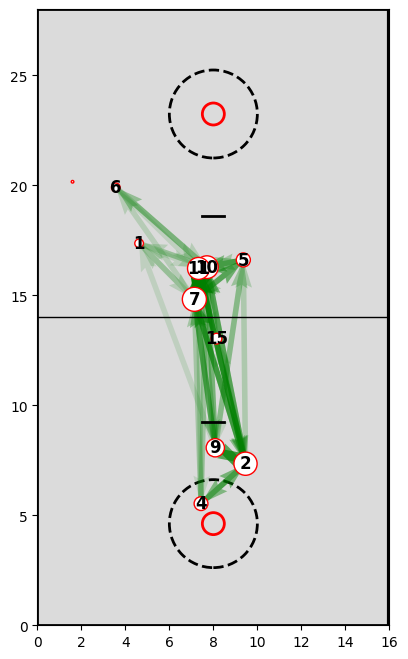

In [101]:
import matplotlib.pyplot as plt
pitch=Pitch()

# Definir las dimensiones del campo
ancho = 16
alto = 28

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(10,8))  # Ajustar el tamaño de la figura

# Dibujar el rectángulo del campo (fondo naranja)
ax.add_patch(plt.Rectangle((0, 0), ancho, alto, fill=True, color='LIGHTGRAY', alpha=0.8))

# Dibujar las líneas de la cancha
ax.plot([0, ancho], [0, 0], color='black', linewidth=2)  # Línea de fondo
ax.plot([0, ancho], [alto, alto], color='black', linewidth=2)  # Otra línea de fondo
ax.plot([0, ancho], [alto/2, alto/2], color='black', linewidth=1)  # Línea central
ax.plot([0, 0], [0, alto], color='black', linewidth=2)  # Línea lateral izquierda
ax.plot([ancho, ancho], [0, alto], color='black', linewidth=3)  # Línea lateral derecha


# Dibujar lineas de penal

ax.plot( [7.5, 8.5],[ (alto /2)*1.33,  (alto /2)*1.33], color='black', linewidth=2)  # Línea penal
ax.plot( [7.5, 8.5],[ (alto /2)*0.66,  (alto/2 )*0.66], color='black', linewidth=2)  # Línea penal


#Aros

ax.add_patch(plt.Circle((ancho/2 , (alto /2)*1.66), radius=0.5, fill=False, color='red', linewidth=2))
ax.add_patch(plt.Circle((ancho/2 , (alto/2 )*0.33), radius=0.5, fill=False, color='red', linewidth=2))

#Circulo de rebote

ax.add_patch(plt.Circle((ancho/2 , (alto /2)*1.66), radius=2, fill=False, color='black', linewidth=2, linestyle='--'))
ax.add_patch(plt.Circle((ancho/2 , (alto/2 )*0.33), radius=2, fill=False, color='black', linewidth=2, linestyle='--'))


# Configurar los ejes
ax.set_xlim(0, ancho)
ax.set_ylim(0, alto)
ax.set_aspect('equal')
plt.axis('on')  # Ocultar ejes


arrows = pitch.arrows(pass_between.Y, pass_between.X, pass_between.Y1, pass_between.X1, ax=ax, color=color, zorder=1)

nodes = pitch.scatter(average_locations.Y, average_locations.X, ax=ax, color='white', ec='red', s=average_locations['marker_size'])

for index, row in pass_between[['pasador', 'Y', 'X']].drop_duplicates(subset='pasador').iterrows():
    pitch.annotate(row.pasador.split(' ')[-1], xy=(row.Y, row.X), c='black', va='center',
                       ha='center', size=12, weight='bold', ax=ax,zorder=1)